# Movie Recommendation using KNN

We will learn to build a recommendation system using KNN using MovieLens Dataset. 

u.data: (100000 ratings, 943 users, 1682 items): user id, item id, rating, timestamp.

u.item: (information about the items (movies)): movie id, movie title, release date, video release date, IMDb URL, unknown,  Action, Adventure, Animation, Children's, Comedy, Crime,  Documentary, Drama, Fantasy, Film-Noir, Horror, Musical, Mystery,  Romance, Sci-Fi, Thriller, War, Western.

Last 19 fields are the generes. 1 - indicates movie of that genre, 0 - indicates it is not. Movies can be of multiple Generes.
Movie IDs are the same used in u.data dataset.

## Loading data

In [4]:
import pandas as pd
import numpy as np
import operator

movie_ratings = pd.read_csv('ml-100k/u.data', sep = '\t', names = ['user_id', 'movie_id', 'rating'], usecols = range(3))
movie_ratings.head()

,user_id,movie_id,rating
0,0,50,5
1,0,172,5
2,0,133,1
3,196,242,3
4,186,302,3


In [12]:
# The groupby() function allows us to group records into buckets by movie ID in this dataset. 
# agg - aggregate Here we are trying to calc for each movie from the rating column alone: number of ratings & mean ratings/movie

rating_distribution = movie_ratings.groupby('movie_id').agg({'rating': [np.size, np.mean]}) 
rating_distribution.head()

rating          
           size      mean
movie_id                 
1           452  3.878319
2           131  3.206107
3            90  3.033333
4           209  3.550239
5            86  3.302326

In [13]:
rating_size = pd.DataFrame(rating_distribution['rating']['size'])

# normalize the Size between 0 and 1 - to know the popularity of the movie
ratings_normalized = rating_size.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
ratings_normalized.sort_index().head(5)

,size
movie_id,
1,0.773585
2,0.222985
3,0.152659
4,0.356775
5,0.145798


## Extracting required information from dataset
Construct a dict with the necessary columns alone: movie name, list of genre values, the popularity score and average rating/movie

In [17]:
movie_details = {} 
with open('ml-100k/u.item') as f:
    for line in f:
        fields = line.rstrip('\n').split('|')
        movieID = int(fields[0])
        name = fields[1]
        genres = fields[5:25]
        genres = np.array(genres,dtype=int) # to convert generes values into int datatype
        
        movie_details[movieID] = (name, genres, ratings_normalized.loc[movieID].get('size'),
                              rating_distribution.loc[movieID].rating.get('mean'))
print (movie_details[93])

('Welcome to the Dollhouse (1995)', array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 0.19039451114922812, 3.7232142857142856)


### Understanding Movie distribution across all generes

In [18]:
genres = ['unknown','Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']
no_of_genres = len(genres)
genre_count = np.zeros(no_of_genres)
#print((avg_genre).shape)

for movie in movie_details:
    genre_count += movie_details[movie][1]

print(genre_count)
print("\nMaximum number of Movies are in genre:" , genres[genre_count.argmax()])

[   2.  251.  135.   42.  122.  505.  109.   50.  725.   22.   24.   92.
   56.   61.  247.  101.  251.   71.   27.]

Maximum number of Movies are in genre: Drama


### Finding average rating of each Genre

In [24]:
avg_genre = np.zeros(no_of_genres)
# Find the average rating for each genre
for movie in movie_details:
    for i in range(no_of_genres):
        if(movie_details[movie][1][i] == True):
            avg_genre[i] = ((avg_genre[i] + movie_details[movie][3])/2)

# Construct a dictionary to store keys (Genre names) and values (Avg. Genre ratings)
print_genre = {}
for i in range(no_of_genres):
    print_genre[genres[i]] = avg_genre[i]

# Print the sorted Dicitonary 
for k,v in sorted(print_genre.items(), key = operator.itemgetter(1), reverse = True):
    print (k,v)
    
# Print Dicitonary legibly:
#import pprint
#pprint.pprint(print_genre, width = 1)

Musical 3.70363230667
Horror 3.30616882071
Documentary 3.15603289163
Thriller 3.0608606536
Comedy 2.94457053992
Action 2.94067225124
Film-Noir 2.85803248676
Adventure 2.76615827069
Children 2.75575773717
Animation 2.53847001208
Sci-Fi 2.47042153574
Drama 2.46729533135
Fantasy 2.425141849
Romance 2.41425331565
Crime 2.32947823797
War 2.23907497276
Mystery 2.0172779256
Western 1.80085452767
unknown 1.36111111111


#### Plotting the data

['unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


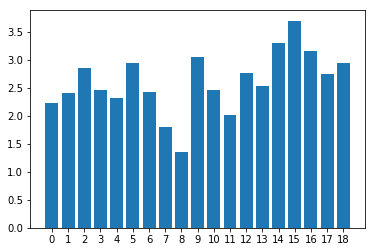

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(len(print_genre))
y = list(print_genre.values())

plt.bar(x, y, align="center")
plt.xticks(x, range(no_of_genres))
print (genres)

## KNN on the movie dataset to find similar movies

### Calculate the Euclidean distance between the movie points

In [23]:
import math

def euclidean_distance(id1, id2):
    genre1 = id1[1]
    genre2 = id2[1]
    
    # zip function aggregates elements from lists (or other iterables, like strings) to return a list of tuples, 
    # such that zip([1,2,3], [4,5,6]) will return [(1,4), (2,5), (3,6)]- for quick computation
    
    points = zip(genre1, genre2)
    squared_diff = [pow(x-y, 2) for (x,y) in points]
    
    return math.sqrt(sum(squared_diff))

# To test the function

print (movieDict[183])
print (movieDict[234])

euclideanDistance = euclidean_distance(movieDict[243], movieDict[259])
Similarity = 1- euclideanDistance

print ("Euclidean Distance = ", euclideanDistance, "and Similarity = " ,Similarity)

('Alien (1979)', array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0]), 0.49742710120068612, 4.0343642611683848)
('Jaws (1975)', array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]), 0.47855917667238423, 3.7749999999999999)
Euclidean Distance =  0.0 and Similarity =  1.0


### Calculate the closest K neighbours from the Euclidean distances

In [32]:
def getKNeighbours(id, K):
    # Calculate Euclidean distance between given movie and every other movie
    all_distances = [(movie, euclidean_distance(movie_details[id], movie_details[movie])) for movie in movie_details]
    all_distances.sort(key = operator.itemgetter(1)) # sort it out by distances
    
    # range(1,K) - because first neighbour (index=0) is the movie itself, so start from 1
    K_neighbours = [all_distances[x][0] for x in range(1,K)]
    
    return K_neighbours

# To print out the list of neighbours' details
def print_neighbours(test_movieid, K = 10):
    
    avgRating = 0

    print (K, "Neighbours of", movie_details[test_movieid][0], "(rating:" , movie_details[test_movieid][3], ") are:\n")

    neighbours = getKNeighbours(test_movieid, K)

    for neighbour in neighbours:
        avgRating += movie_details[neighbour][3] # to calculate Average Rating for all neighbours
        print (movie_details[neighbour][0] + " " + str(movie_details[neighbour][3]))

    print ("Average Rating for all neighbours: " , float(avgRating)/float(K))

In [33]:
print_neighbours(1, 10)    

10 Neighbours of Toy Story (1995) (rating: 3.87831858407 ) are:

Aladdin and the King of Thieves (1996) 2.84615384615
Santa Clause, The (1994) 3.09756097561
Home Alone (1990) 3.08759124088
Aladdin (1992) 3.81278538813
Aristocats, The (1970) 3.12962962963
D3: The Mighty Ducks (1996) 2.57894736842
Love Bug, The (1969) 2.78
Wrong Trousers, The (1993) 4.46610169492
Grand Day Out, A (1992) 4.10606060606
Average Rating for all neighbours:  2.9904830749793914


In [34]:
print_neighbours(123, 10)

10 Neighbours of Frighteners, The (1996) (rating: 3.2347826087 ) are:

Young Frankenstein (1974) 3.945
Tales from the Hood (1995) 2.03703703704
Howling, The (1981) 3.02631578947
Braindead (1992) 3.85714285714
Bad Taste (1987) 3.375
April Fool's Day (1986) 2.66666666667
Dracula: Dead and Loving It (1995) 2.28
Cemetery Man (Dellamorte Dellamore) (1994) 2.86956521739
Machine, The (1994) 1.5
Average Rating for all neighbours:  2.555672756771155
